In [146]:
import requests
import json

HOST = "http://localhost:8000/"
API_CANCLED = "canclled"
API_PNR_RANKING = "pnr_ranking?flight_id="
API_ALT_FLIGHT="alt_flight?flight_id="

def get_cancled():
    response = requests.request("GET", HOST + API_CANCLED, headers={}, data={})
    return json.loads(response.text)

def get_pnrs(flight_id):
    response = requests.request("GET", HOST + API_PNR_RANKING + str(flight_id), headers={}, data={})
    return json.loads(response.text)

def get_alt_flights(flight_id):
    response = requests.request("GET", HOST + API_ALT_FLIGHT + str(flight_id), headers={}, data={})
    return json.loads(response.text)

In [147]:
MAX_ARRIVAL_SCORE = 70
MIN_ARRIVAL_SCORE = 30
MAX_DEPARTURE_SCORE = 70
MIN_DEPARTURE_SCORE = 30

In [148]:
import datetime

def get_departure_score(pnr, alt_flight):
    #datetime to timestamp
    delay_seconds = (datetime.datetime.fromisoformat(alt_flight["departure_time"].rstrip('Z')) - datetime.datetime.fromisoformat(pnr["departure_time"].rstrip('Z'))).total_seconds()
    delay_hours = delay_seconds / 3600
    delay_score = MAX_DEPARTURE_SCORE + (MIN_DEPARTURE_SCORE - MAX_DEPARTURE_SCORE) * delay_hours / 48
    return delay_score
    
def get_arrival_score(pnr, alt_flight):
    delay_seconds = (datetime.datetime.fromisoformat(alt_flight["arrival_time"].rstrip('Z')) - datetime.datetime.fromisoformat(pnr["arrival_time"].rstrip('Z'))).total_seconds()
    delay_hours = delay_seconds / 3600
    delay_score = MAX_ARRIVAL_SCORE + (MIN_ARRIVAL_SCORE - MAX_ARRIVAL_SCORE) * delay_hours / 48
    return delay_score

In [149]:
cancel = get_cancled()
cancel['data'][0]
map_cabin={ 'F':'F','P':'F','C':'B','J':'B','Z':'B','Q':'P','R':'P','S':'P','T':'P','H':'P','M':'P',
          'Y':'E', 'A':'E', 'B':'E', 'D':'E', 'E':'E', 'G':'E', 'I':'E', 'K':'E', 'L':'E', 'N':'E', 'O':'E',
           'U':'E', 'V':'E','W':'E','X':'E'}

In [150]:
print(len(get_alt_flights('c53865e9')["data"]["data"]))
print(type(get_alt_flights('c53865e9')["data"]))
print(get_alt_flights('c53865e9')["data"])
for x in get_alt_flights('c53865e9')["data"]:
    print(x)

8
<class 'dict'>
{'data': [{'flight_id': '6246013f', 'departure_airport': 'IMF', 'arrival_airport': 'HBX', 'status': 'Scheduled', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'total_avilable_seats': 52, 'avilable_seats': {'F': 4, 'P': 5, 'C': 3, 'J': 3, 'Z': 6, 'Q': 2, 'R': 0, 'S': 0, 'T': 2, 'H': 1, 'M': 3, 'Y': 1, 'A': 3, 'B': 2, 'D': 0, 'G': 4, 'I': 2, 'E': 1, 'K': 0, 'L': 4, 'N': 1, 'O': 0, 'U': 0, 'V': 1, 'W': 1, 'X': 3}}, {'flight_id': 'a3338dd3', 'departure_airport': 'IMF', 'arrival_airport': 'HBX', 'status': 'Scheduled', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'total_avilable_seats': 50, 'avilable_seats': {'F': 3, 'P': 1, 'C': 4, 'J': 0, 'Z': 2, 'Q': 0, 'R': 3, 'S': 1, 'T': 0, 'H': 2, 'M': 1, 'Y': 3, 'A': 2, 'B': 4, 'D': 0, 'G': 1, 'I': 4, 'E': 1, 'K': 4, 'L': 1, 'N': 2, 'O': 3, 'U': 3, 'V': 1, 'W': 0, 'X': 4}}, {'flight_id': '79791ce3', 'departure_airport': 'IMF', 'arrival_airport': 

In [151]:
pnr={}
alt_flight={}
for f in cancel['data']:
    pnr[f['flight_id']]=get_pnrs(f['flight_id'])['data']
    # print(pnr[f['flight_id']])
    for p in pnr[f['flight_id']]:
        p['arrival_time'] = f['arrival_time']
        p['departure_time'] = f['departure_time']
        # print(p)
    alt=get_alt_flights(f['flight_id'])['data']['data']
    f2=[]
    for flight in alt:
        # print(flight)
        f3={}
        f3['flight_id']=flight['flight_id']
        f3['arrival_time'] = flight['arrival_time']
        f3['departure_time'] = flight['departure_time']
        f3['F']=0
        f3['B']=0
        f3['P']=0
        f3['E']=0
#         print()
        for key in map_cabin:
            if key in flight['avilable_seats']:
                f3[map_cabin[key]]+=flight['avilable_seats'][key]
        f2.append(f3)
    alt_flight[f['flight_id']]=f2
    # break

In [152]:
print(len(alt_flight))
print(len(pnr))
print(len(cancel['data']))
print(len(pnr['c53865e9']))

27
27
27
119


In [153]:
for i in alt_flight:
    print(alt_flight[i])
    print(pnr[i])
    break
    

[{'flight_id': '6246013f', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'F': 9, 'B': 12, 'P': 8, 'E': 23}, {'flight_id': 'a3338dd3', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'F': 4, 'B': 6, 'P': 7, 'E': 33}, {'flight_id': '79791ce3', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'F': 3, 'B': 6, 'P': 15, 'E': 22}, {'flight_id': '487a3129', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'F': 0, 'B': 13, 'P': 10, 'E': 31}, {'flight_id': '82ab029c', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'F': 6, 'B': 3, 'P': 7, 'E': 18}, {'flight_id': '93d3ede0', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-12-08T12:10:17.835Z', 'F': 3, 'B': 13, 'P': 5, 'E': 27}, {'flight_id': '6e7e9e93', 'arrival_time': '2023-12-08T14:49:17.835Z', 'departure_time': '2023-

In [154]:
used_seat={}

for i in alt_flight:
    for j in alt_flight[i]:
        used_seat[j['flight_id']]={'F':0,'B':0,'P':0,'E':0}
#             print(j)
        
len(used_seat)

1334

In [155]:
print(len(pnr))
pnr

27


{'c53865e9': [{'pnr': 'e36140',
   'score': 2700,
   'class': 'F',
   'pax': 4,
   'arrival_time': '2023-12-08T14:00:17.249Z',
   'departure_time': '2023-12-08T12:03:17.249Z'},
  {'pnr': '9c112d',
   'score': 2550,
   'class': 'P',
   'pax': 5,
   'arrival_time': '2023-12-08T14:00:17.249Z',
   'departure_time': '2023-12-08T12:03:17.249Z'},
  {'pnr': 'a53d26',
   'score': 2350,
   'class': 'P',
   'pax': 1,
   'arrival_time': '2023-12-08T14:00:17.249Z',
   'departure_time': '2023-12-08T12:03:17.249Z'},
  {'pnr': 'ddb1f4',
   'score': 2300,
   'class': 'P',
   'pax': 4,
   'arrival_time': '2023-12-08T14:00:17.249Z',
   'departure_time': '2023-12-08T12:03:17.249Z'},
  {'pnr': '7d7296',
   'score': 2250,
   'class': 'F',
   'pax': 1,
   'arrival_time': '2023-12-08T14:00:17.249Z',
   'departure_time': '2023-12-08T12:03:17.249Z'},
  {'pnr': 'd7eff6',
   'score': 2250,
   'class': 'P',
   'pax': 1,
   'arrival_time': '2023-12-08T14:00:17.249Z',
   'departure_time': '2023-12-08T12:03:17.249Z'}

In [156]:
needed_seat=[]
needed_pnr = {}
for i in pnr:
    alloc={}
    for j in pnr[i]:
        alloc=j
        alloc['flight_id']=i
        needed_seat.append(alloc)
        needed_pnr[j['pnr']]=alloc
print(len(needed_seat))
print(needed_seat)


2545
[{'pnr': 'e36140', 'score': 2700, 'class': 'F', 'pax': 4, 'arrival_time': '2023-12-08T14:00:17.249Z', 'departure_time': '2023-12-08T12:03:17.249Z', 'flight_id': 'c53865e9'}, {'pnr': '9c112d', 'score': 2550, 'class': 'P', 'pax': 5, 'arrival_time': '2023-12-08T14:00:17.249Z', 'departure_time': '2023-12-08T12:03:17.249Z', 'flight_id': 'c53865e9'}, {'pnr': 'a53d26', 'score': 2350, 'class': 'P', 'pax': 1, 'arrival_time': '2023-12-08T14:00:17.249Z', 'departure_time': '2023-12-08T12:03:17.249Z', 'flight_id': 'c53865e9'}, {'pnr': 'ddb1f4', 'score': 2300, 'class': 'P', 'pax': 4, 'arrival_time': '2023-12-08T14:00:17.249Z', 'departure_time': '2023-12-08T12:03:17.249Z', 'flight_id': 'c53865e9'}, {'pnr': '7d7296', 'score': 2250, 'class': 'F', 'pax': 1, 'arrival_time': '2023-12-08T14:00:17.249Z', 'departure_time': '2023-12-08T12:03:17.249Z', 'flight_id': 'c53865e9'}, {'pnr': 'd7eff6', 'score': 2250, 'class': 'P', 'pax': 1, 'arrival_time': '2023-12-08T14:00:17.249Z', 'departure_time': '2023-12-0

In [157]:
sorted_pnr = sorted(needed_seat, key=lambda x: x['score'],reverse=True)
print(len(sorted_pnr))
print(sorted_pnr[0])

2545
{'pnr': '6be5cc', 'score': 4150, 'class': 'P', 'pax': 3, 'arrival_time': '2023-12-07T16:25:17.527Z', 'departure_time': '2023-12-07T15:42:17.527Z', 'flight_id': '54900d6c'}


['6be5cc', 'cde5e8', '26c155', 'dd676b', '8fcd1e', '17765d', 'd8aab8', '72b3b1', 'b07182', 'e36140', '33a7db', '296ae4', '4b3deb', 'f2087c', '272f22', '4fb227', '71ca17', '6d0ec5', '71038a', 'a1b102', '90b52c', '40e949', '9c112d', '59d8d2', 'c4bffc', '9b95c5', '4b0c46', '9cc845', '76aa4a', 'eb0db0', '79cd41', '4a73e9', '84ed58', '9152a5', 'eb3706', 'bdf4bd', '5dcb8b', '9bd290', '5393d4', '927ac6', 'e0418d', 'beef87', '6db321', 'f510d5', 'af5e0c', '39ecfc', '6d0ed4', 'f453be', 'af7c34', 'c313eb', 'f69828', '3de470', 'ddd40f', 'c6cefe', '68854f', '781461', '4f1ca8', 'a53d26', '37291d', '3a1a01', 'b098f9', '11e479', '52ba92', '61b7a7', 'a70c90', '688108', '1e077c', '48f7e2', '17e7dd', '4eef5c', '636f38', 'dd1f76', '344c8b', 'f2ef9a', '0a3cd4', 'ddb1f4', '52efd7', '60c5c7', '045742', '9736dd', '4996e4', '33b8fb', '93ea85', '857abc', '36c618', 'b550c5', 'e06a21', '5ba446', 'b6c67e', '384205', '586cbd', 'e920f4', '7d7296', 'd7eff6', 'c5fa12', '00b187', '19c1d5', '1a02f2', 'bf8e65', '67a713',

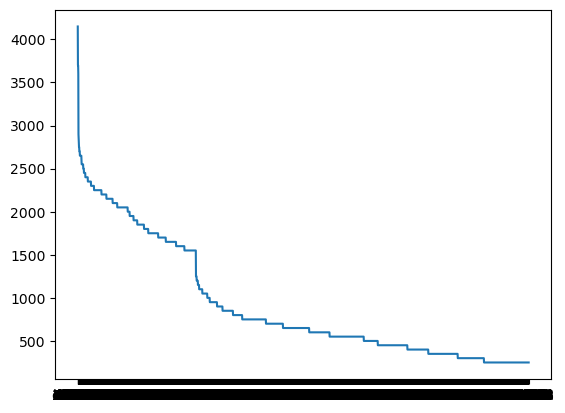

In [158]:
# plot the sorted pnr based on the score
import matplotlib.pyplot as plt
import numpy as np
x=[]
y=[]
for i in sorted_pnr:
    x.append(i['pnr'])
    y.append(i['score'])
print(x)
print(y)
plt.plot(x,y)
plt.show()

In [159]:
import plotly.express as px
import pandas as pd
# Creating a DataFrame from the sorted PNR data
df = pd.DataFrame(sorted_pnr)

# Sorting the DataFrame by score in descending order
df = df.sort_values(by='score', ascending=False)

# Plotting with plotly express
fig = px.bar(df.head(100), x='score', y='pnr', orientation='h', text='score',
             title='PNRs  Scores',
             labels={'score': 'PNR Score', 'pnr': 'PNR'},
             height=600)

# Adding interactivity
fig.update_layout(xaxis_title='PNR Score', yaxis_title='PNR', yaxis_categoryorder='total ascending')

# Show the interactive plot
fig.show()

In [160]:
allocated={}
for i in sorted_pnr:
    allocated[i['pnr']]='NULL'

In [161]:
index_pnr=0
flight_index={i : {'F':0,'B':0,'P':0,'E':0} for i in pnr}
# flight_index
used_seat

{'6246013f': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'a3338dd3': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '79791ce3': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '487a3129': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '82ab029c': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '93d3ede0': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '6e7e9e93': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '383a9958': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '3edfe26b': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'e37c018c': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'ed6fcfe5': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'ec0634ec': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '9e5265d4': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'd760ce08': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'd6d4c356': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '6e205e49': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'd9707350': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '98b536f8': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'd7e33413': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '1682c749': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 'c11ccb3e': {'F': 0, 'B': 0, 'P': 0, 'E': 0},
 '658c1364': 

In [162]:
# ik=0
for i in sorted_pnr:
#     ik+=1
#     if(ik>5):
#         break
#     print(i)
    cabin=map_cabin[i['class']]
    ind = 0
#     print(used_seat)
    while(ind<len(alt_flight[i['flight_id']])):
        
        max_seat=alt_flight[i['flight_id']][ind][cabin]
        print(alt_flight[i['flight_id']][ind])
        alt = {}
        alt['flight_id'] = alt_flight[i['flight_id']][ind]['flight_id']
        alt['arrival_time'] = alt_flight[i['flight_id']][ind]['arrival_time']
        alt['departure_time'] = alt_flight[i['flight_id']][ind]['departure_time']
        print(max_seat)
        print(ind)
        print(alt)
#         print(used_seat)
        
        if(used_seat[alt['flight_id']][cabin]+i['pax']<=max_seat):
            used_seat[alt['flight_id']][cabin]+=i['pax']
            allocated[i['pnr']]=alt
            print("allovc")
            break            
        
        ind+=1
        

{'flight_id': '634e5d5c', 'arrival_time': '2023-12-07T14:34:17.677Z', 'departure_time': '2023-12-07T12:29:17.677Z', 'F': 2, 'B': 14, 'P': 14, 'E': 19}
2
0
{'flight_id': '634e5d5c', 'arrival_time': '2023-12-07T14:34:17.677Z', 'departure_time': '2023-12-07T12:29:17.677Z'}
{'flight_id': 'ee6ac073', 'arrival_time': '2023-12-07T14:34:17.677Z', 'departure_time': '2023-12-07T12:29:17.677Z', 'F': 4, 'B': 9, 'P': 12, 'E': 19}
4
1
{'flight_id': 'ee6ac073', 'arrival_time': '2023-12-07T14:34:17.677Z', 'departure_time': '2023-12-07T12:29:17.677Z'}
allovc
{'flight_id': 'ad0d072f', 'arrival_time': '2023-12-07T13:43:17.432Z', 'departure_time': '2023-12-07T13:30:17.432Z', 'F': 0, 'B': 10, 'P': 12, 'E': 24}
10
0
{'flight_id': 'ad0d072f', 'arrival_time': '2023-12-07T13:43:17.432Z', 'departure_time': '2023-12-07T13:30:17.432Z'}
allovc
{'flight_id': '71b1c03b', 'arrival_time': '2023-12-07T16:34:17.352Z', 'departure_time': '2023-12-07T15:19:17.352Z', 'F': 1, 'B': 2, 'P': 1, 'E': 3}
2
0
{'flight_id': '71b1c0

In [163]:
used_seat[alt['flight_id']]

{'F': 4, 'B': 0, 'P': 9, 'E': 22}

In [164]:
sum=0
for i in allocated: 
    if allocated[i]=='NULL':
        sum+=1

In [165]:
print(len(allocated))
print(allocated)

2545
{'6be5cc': {'flight_id': 'ee6ac073', 'arrival_time': '2023-12-07T14:34:17.677Z', 'departure_time': '2023-12-07T12:29:17.677Z'}, 'cde5e8': {'flight_id': 'ad0d072f', 'arrival_time': '2023-12-07T13:43:17.432Z', 'departure_time': '2023-12-07T13:30:17.432Z'}, '26c155': {'flight_id': '17974838', 'arrival_time': '2023-12-08T00:00:17.638Z', 'departure_time': '2023-12-07T21:00:17.638Z'}, 'dd676b': 'NULL', '8fcd1e': {'flight_id': '2c4d7de2', 'arrival_time': '2023-12-07T22:56:17.615Z', 'departure_time': '2023-12-07T20:38:17.615Z'}, '17765d': {'flight_id': '105b8907', 'arrival_time': '2023-12-07T16:34:17.352Z', 'departure_time': '2023-12-07T15:19:17.352Z'}, 'd8aab8': {'flight_id': 'bcff4322', 'arrival_time': '2023-12-07T13:10:17.322Z', 'departure_time': '2023-12-07T12:26:17.322Z'}, '72b3b1': {'flight_id': 'd4ce8a8e', 'arrival_time': '2023-12-07T14:51:17.334Z', 'departure_time': '2023-12-07T14:26:17.334Z'}, 'b07182': {'flight_id': '819c02be', 'arrival_time': '2023-12-07T22:56:17.615Z', 'depart

In [166]:
pnr_alt_flight_score = {}
unallocated_pnr = {}
allocated_pnr = {}
for pnr_id in allocated:
    pnr = needed_pnr[pnr_id]
    alt_flight = allocated[pnr_id]
    if alt_flight == "NULL":
        unallocated_pnr[pnr_id] = needed_pnr[pnr_id]
        continue
    allocated_pnr[pnr_id] = needed_pnr[pnr_id]
    pnr_alt_flight_score[(pnr['pnr'], alt_flight['flight_id'])] = get_arrival_score(pnr, alt_flight) + get_departure_score(pnr, alt_flight)
    
print(pnr_alt_flight_score)

{('6be5cc', 'ee6ac073'): 144.22215277777778, ('cde5e8', 'ad0d072f'): 176.79174722222223, ('26c155', '17974838'): 128.7222925925926, ('8fcd1e', '2c4d7de2'): 135.97235231481483, ('17765d', '105b8907'): 139.65298055555556, ('d8aab8', 'bcff4322'): 178.6947162037037, ('72b3b1', 'd4ce8a8e'): 170.97238472222222, ('b07182', '819c02be'): 135.97235231481483, ('e36140', '6246013f'): 139.2219509259259, ('33a7db', 'e887392d'): 159.0276074074074, ('296ae4', '62169d28'): 137.1667574074074, ('4b3deb', '21db4339'): 147.68050370370372, ('f2087c', '5c6e92d2'): 159.0276074074074, ('272f22', '755a659b'): 144.20830694444444, ('4fb227', 'b3a5d715'): 161.9998726851852, ('71ca17', '4aa6cb43'): 150.1806648148148, ('6d0ec5', '95e5c86a'): 137.1667574074074, ('71038a', '62169d28'): 137.1667574074074, ('a1b102', '9d08aad9'): 161.70836435185186, ('90b52c', 'a3658f53'): 157.26404074074074, ('40e949', '755a659b'): 144.20830694444444, ('9c112d', '6246013f'): 139.2219509259259, ('59d8d2', '81f181b5'): 147.68050370370372

In [194]:
import plotly.graph_objects as go
print(len(allocated_pnr))
print(len(allocated))
sorted_pnrs = sorted(allocated_pnr.keys(), key=lambda x: allocated_pnr[x]['pnr'], reverse=True)[:100]
flight_ids = [allocated[pnr] for pnr in sorted_pnrs][:100]
scores = [int(allocated_pnr[pnr]['score']) for pnr in sorted_pnrs]
scores = [x / 1000 for x in scores]
print(len(scores))

# Create a bar chart
fig = go.Figure()

# Bar chart for PNR scores
fig.add_trace(go.Bar(x=sorted_pnrs, y=scores, name='PNR Score'))

# Line chart for rescheduling scores
rescheduling_scores = [pnr_alt_flight_score[(pnr, allocated[pnr]['flight_id'])] for pnr in sorted_pnrs]
rescheduling_scores = [x/50-2.5 for x in rescheduling_scores]
fig.add_trace(go.Scatter(x=sorted_pnrs, y=rescheduling_scores, mode='lines+markers', name='Rescheduling Score', line=dict(color='red')))

# Layout customization
fig.update_layout(
    xaxis=dict(title='PNR'),
    yaxis=dict(title='Score'),
    title='PNRs with High Scores and Rescheduling Scores',
    barmode='group'
)

# Display the plot
fig.show()

2317
2545
100


In [169]:
# Example data (replace with your actual data)
allocated_scores = [allocated_pnr[pnr]['score'] for pnr in allocated_pnr]
unallocated_scores = [unallocated_pnr[pnr]['score'] for pnr in unallocated_pnr]

# Create a stacked bar chart
fig = go.Figure()

# Bar chart for allocated PNRs
fig.add_trace(go.Bar(x=list(allocated_pnr.keys()), y=allocated_scores, name='Allocated', marker_color='blue'))

# Bar chart for unallocated PNRs
fig.add_trace(go.Bar(x=list(unallocated_pnr.keys()), y=unallocated_scores, name='Unallocated', marker_color='orange'))

# Layout customization
fig.update_layout(
    xaxis=dict(title='PNR'),
    yaxis=dict(title='Score'),
    title='Distribution of Allocated and Unallocated PNRs',
    barmode='stack'
)

# Display the plot
fig.show()

In [184]:
import plotly.express as px
import pandas as pd
import numpy as np

# Calculate mean scores
allocated_mean = np.mean(allocated_scores) if allocated_scores else 0
unallocated_mean = np.mean(unallocated_scores) if unallocated_scores else 0

# Create a DataFrame for the number of PNRs
df_count = pd.DataFrame(dict(
    PNRs=['Allocated', 'Unallocated'],
    Count=[len(allocated_pnr), len(unallocated_pnr)]
))

# Create a DataFrame for mean scores
df_mean = pd.DataFrame(dict(
    PNRs=['Allocated', 'Unallocated'],
    MeanScore=[allocated_mean, unallocated_mean]
))

# Create a pie chart for the number of PNRs
fig_count = go.Figure(data=[go.Pie(labels=df_count['PNRs'], values=df_count['Count'], hole=0.3)])
fig_count.update_layout(title_text='Number of Allocated and Unallocated PNRs')

# Create a pie chart for mean scores
fig_mean = go.Figure(data=[go.Pie(labels=df_mean['PNRs'], values=df_mean['MeanScore'], hole=0.3)])
fig_mean.update_layout(title_text='Mean Scores of Allocated and Unallocated PNRs')

# Display the plots side by side
fig_count.show()
fig_mean.show()
